Calcular funciones de correlación 

In [1]:
from __future__ import print_function 
import matplotlib.pyplot as plt
import copy
import numpy as np
%matplotlib inline

In [2]:
#from colossus.tests import run_tests

In [3]:
from colossus.cosmology import cosmology

In [4]:
cosmo = cosmology.setCosmology('planck15')
print(cosmo)

Cosmology "planck15" 
    flat = True, Om0 = 0.3089, Ode0 = 0.6910, Ob0 = 0.0486, H0 = 67.74, sigma8 = 0.8159, ns = 0.9667
    de_model = lambda, relspecies = True, Tcmb0 = 2.7255, Neff = 3.0460, powerlaw = False


In [5]:
#Modificando la cosmología

cosmo.Om0=0.29
cosmo.Omde=0.71
cosmo.ns=0.97
cosmo.H0=70
cosmo.relspecies=False
cosmo.checkForChangedCosmology()
print(cosmo)

Cosmology: Detected change in cosmological parameters.
Cosmology "planck15" 
    flat = True, Om0 = 0.2900, Ode0 = 0.7100, Ob0 = 0.0486, H0 = 70.00, sigma8 = 0.8159, ns = 0.9700
    de_model = lambda, relspecies = False, Tcmb0 = 2.7255, Neff = 3.0460, powerlaw = False


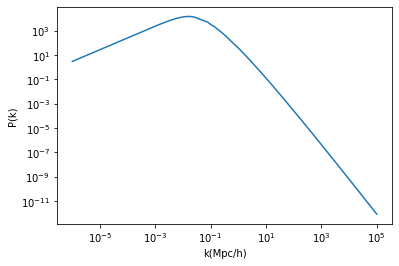

In [6]:
k=10**np.linspace(-6,5,100000)
Pk=cosmo.matterPowerSpectrum(k,0.57)

plt.figure()
plt.loglog()
plt.xlabel('k(Mpc/h)')
plt.ylabel('P(k)')
plt.plot(k, Pk, '-')

In [7]:
Pk_=cosmo.matterPowerSpectrum

In [8]:
#path=ddatos/GilMarin_boss_data/post-recon/cmass/GilMarin_2016_CMASSDR12_measurement_monopole_post_recon.txt
pk_cmasdr12=np.loadtxt("/Users/stefany/Desktop/analisisdatos/da2019-Stefany2889/datos/GilMarin_boss_data/post-recon/cmass/GilMarin_2016_CMASSDR12_measurement_monopole_post_recon.txt").T

3

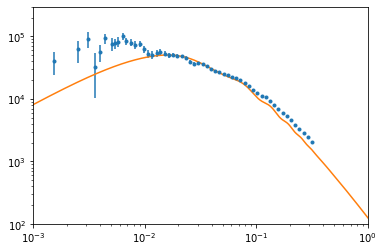

In [9]:
plt.figure()
plt.loglog()
plt.errorbar(pk_cmasdr12[0],pk_cmasdr12[1], yerr=pk_cmasdr12[2], fmt='.' )
plt.plot(k, 1.85 **2 * Pk, '-')
plt.xlim(1e-3,1)
plt.ylim(100,3e5)

len(pk_cmasdr12)

In [10]:
cosmo = cosmology.setCosmology('planck15')
print(cosmo)

def Pk_Om(Om_,b2, k, z):
    cosmo.Om0=Om_
    return b2*cosmo.matterPowerSpectrum(k,z)


Cosmology "planck15" 
    flat = True, Om0 = 0.3089, Ode0 = 0.6910, Ob0 = 0.0486, H0 = 67.74, sigma8 = 0.8159, ns = 0.9667
    de_model = lambda, relspecies = True, Tcmb0 = 2.7255, Neff = 3.0460, powerlaw = False


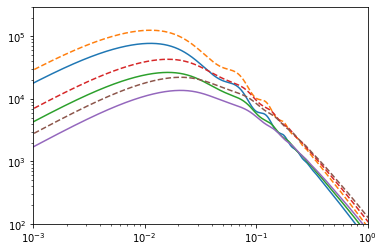

In [11]:


plt.figure()
plt.loglog()

OM=[0.2,0.3, 0.4]
for om in OM:
    plt.plot(k,Pk_Om(om, 1.85, k, 0.57), '-')
    plt.plot(k,Pk_Om(om, 3, k, 0.57), '--')
    
    plt.xlim(1e-3,1)
    plt.ylim(100,3e5)


Para definir los parametros entre de baias y el omega de materia

In [12]:
#baias de 0.1 a 5
# Pk_Om(Om_,b2, k, z) es la definicion del modelo, que nos regresa b2*cosmo.matterPowerSpectrum(k,z)
 
def chisq(theta, data):                 # Donde theta son los datos que se generan a aprtir del montecarlo 
    x= data[0]                          
    y= data[1]
    yerr= data[2]
    #lo siguiente depende del modelo 
    model= Pk_Om(theta[0],theta[1], x, z)
    chisq= (y-model)**2 / yerr**2
    return chisq.sum()

def comparacion(chisq_ini, chisq_new):  #funcioón para comparar los modelos
    a=np.log(np.random.uniform(0,1))
    
    if chisq_new < chisq_ini:
        chisq_ini= chisq_new
        acc=True
        
    elif (chisq_ini-chisq_new) > a:
        chisq_ini= chisq_new
        acc=True
    
    else: 
        chisq_ini= chisq_ini
        acc=False
            
    return chisq_ini, acc

#def montecarlo(x_ini, y_ini, data, s2, n):  #donde s2 esel sigma cuadrada
def montecarlo(theta, data, s2, n):  #theta son los valores que inician la busqueda(parametros a ajustar), 
                                    #data son los datos experimentales        
                                    #s2 esel sigma cuadrada
            
    x_=data[0]
    y_=data[1]
    err_=data[2]
    
    chisqr_stor=np.zeros(n)
    x=np.zeros(n)
    y=np.zeros(n)
    k=0               #Contador devalores acepados    (Para este caso x sera omega y y sera b2)
    
    x_ini= theta[0]
    y_ini= theta[1]
    z=theta[2]
    

    for i in range(n):
    
        x[i]=x_ini
        y[i]=y_ini
        
    
        x_new =s2* np.random.randn()+ x_ini
        y_new =s2* np.random.randn()+ y_ini   #Se generan los nuevos pares de parámetros
    
        chisqr_ini=chisq([x_ini,y_ini, z], data)
        
        chisqr_stor[i]= chisqr_ini
        
        chisqr_new=chisq([x_new,y_new, z], data)
        
        if x_new <0.0 and x_new > 1.0 and y_new< 0.1 and y_new > 5:
            chisqr_new='inf'

        chisq_comp,acc= comparacion(chisqr_ini, chisqr_new)
            
            
        if acc is not True: # == chisqr_ini:
            x_ini=x_ini
            y_ini=y_ini
        else:
            x_ini=x_new
            y_ini=y_new
            k= k + 1
        
    
    return x, y, chisqr_stor, k
    




In [13]:
Om_ini=0.7
b2_ini=0.4
z=0.57

    
pk_prueba= montecarlo([0.7, 0.4, z], pk_cmasdr12, 0.1, 100)

/Users/stefany/miniconda3/envs/analisis-env/lib/python3.7/site-packages/colossus/cosmology/cosmology.py:2237: ComplexWarning: Casting complex values to real discards the imaginary part
  test_k_integrand[i] = logIntegrand(test_k[i], ps_interpolator)
/Users/stefany/miniconda3/envs/analisis-env/lib/python3.7/site-packages/scipy/integrate/quadpack.py:448: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)


Exception: Got zero or negative data in power spectrum from model eisenstein98, cannot compute log.

#### Libreria numba 

@jit

def Pk(theta, args=todo lo demas)